 **IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**IMPORTING THE DATASET**

In [2]:
dataset = pd.read_csv('insurance.csv')

**DATA VISUALIZATION**




In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [4]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
343,63,1,36.765,0,0,0,13981.85035
344,49,0,41.470,4,0,2,10977.20630
345,34,0,29.260,3,0,2,6184.29940
346,33,1,35.750,2,0,2,4889.99950
347,46,1,33.345,1,0,0,8334.45755


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       348 non-null    int64  
 1   sex       348 non-null    int64  
 2   bmi       348 non-null    float64
 3   children  348 non-null    int64  
 4   smoker    348 non-null    int64  
 5   region    348 non-null    int64  
 6   charges   348 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 19.2 KB


In [6]:
dataset.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,39.591954,0.508621,30.676552,1.091954,0.232759,1.497126,14016.426293
std,14.417015,0.500646,5.625850,1.192021,0.423198,1.104089,12638.887852
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1137.011000
25%,27.000000,0.000000,26.782500,0.000000,0.000000,1.000000,4888.466125
50%,40.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9719.305250
75%,53.000000,1.000000,34.777500,2.000000,0.000000,2.000000,19006.316150
max,64.000000,1.000000,49.060000,5.000000,1.000000,3.000000,51194.559140


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


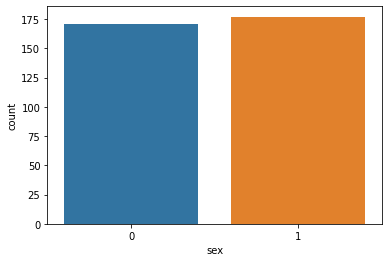

In [8]:
sns.countplot(dataset['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


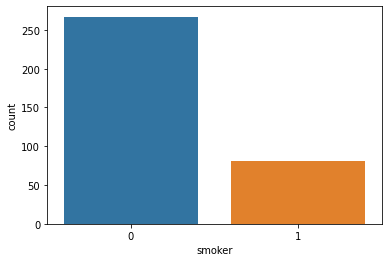

In [9]:
sns.countplot(dataset['smoker'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


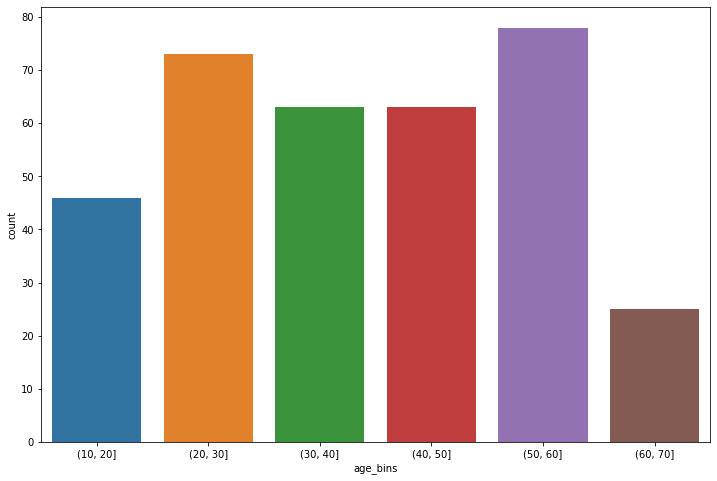

In [10]:
dataset['age_bins'] = pd.cut(x = dataset['age'],bins=[10,20,30,40,50,60,70])
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(dataset['age_bins'], ax = ax)

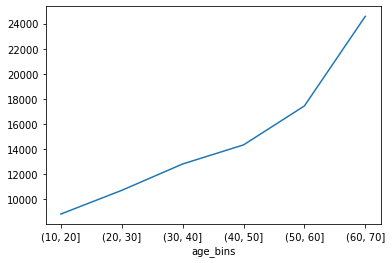

In [11]:
dataset.groupby(by='age_bins')['charges'].mean().plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


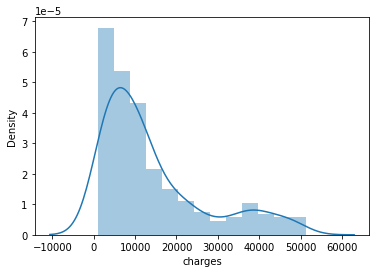

In [12]:
sns.distplot(dataset['charges'])

**SPLITTING THE DATASET INTO TRAINING AND TEST SET**

In [13]:
X = dataset.drop(columns=['age_bins','charges'])
y = dataset['charges']

In [14]:
print(X)

     age  sex     bmi  children  smoker  region
0     19    0  27.900         0       1       3
1     18    1  33.770         1       0       2
2     28    1  33.000         3       0       2
3     33    1  22.705         0       0       1
4     32    1  28.880         0       0       1
..   ...  ...     ...       ...     ...     ...
343   63    1  36.765         0       0       0
344   49    0  41.470         4       0       2
345   34    0  29.260         3       0       2
346   33    1  35.750         2       0       2
347   46    1  33.345         1       0       0

[348 rows x 6 columns]


In [15]:
print(y)

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
343    13981.85035
344    10977.20630
345     6184.29940
346     4889.99950
347     8334.45755
Name: charges, Length: 348, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

 **MODEL SELECTION**

MULTIPLE-LINEAR REGRESSION

In [17]:
from sklearn.linear_model import LinearRegression
multiple_linear_regressor = LinearRegression()
multiple_linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = multiple_linear_regressor.predict(X_test)
np.set_printoptions(precision=2)
from sklearn.metrics import r2_score
multiple_linear_score = r2_score(y_test, y_pred)*100
print('Multiple-Linear Regression Score: ' , multiple_linear_score)

Multiple-Linear Regression Score:  70.63302200201555


POLYNOMIAL REGRESSION

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = polynomial_regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
from sklearn.metrics import r2_score
polynomial_score = r2_score(y_test, y_pred)*100
print('Polynomial Regression Score: ' , polynomial_score)

Polynomial Regression Score:  84.02427501270544


SUPPORT VECTOR REGRESSION

In [21]:
print(y)

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
343    13981.85035
344    10977.20630
345     6184.29940
346     4889.99950
347     8334.45755
Name: charges, Length: 348, dtype: float64


In [22]:
x_SVR = X
y_SVR = y.values.reshape(len(y),1)
from sklearn.model_selection import train_test_split
X_SVR_train, X_SVR_test, y_SVR_train, y_SVR_test = train_test_split(x_SVR, y_SVR, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_SVR_train = sc_X.fit_transform(X_SVR_train)
y_SVR_train = sc_y.fit_transform(y_SVR_train)

In [23]:
from sklearn.svm import SVR
SVR_regressor = SVR(kernel = 'rbf')
SVR_regressor.fit(X_SVR_train, y_SVR_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
y_pred = sc_y.inverse_transform(SVR_regressor.predict(sc_X.transform(X_SVR_test)))
np.set_printoptions(precision=2)
from sklearn.metrics import r2_score
SVR_score = r2_score(y_SVR_test, y_pred)*100
print('SVR Regression Score: ' , SVR_score)

SVR Regression Score:  86.70855157691061


DECISION TREE

In [25]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [26]:
y_pred = decision_tree_regressor.predict(X_test)
np.set_printoptions(precision=2)
from sklearn.metrics import r2_score
decision_tree_score = r2_score(y_test, y_pred)*100
print('Decision Tree Regression Score: ' , decision_tree_score)

Decision Tree Regression Score:  62.95555398186391


RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(max_depth=3,random_state=0,n_estimators=55)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=55, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [28]:
y_pred = random_forest_regressor.predict(X_test)
np.set_printoptions(precision=2)
from sklearn.metrics import r2_score
random_forest_score = r2_score(y_test, y_pred)*100
print('Random Forest Regression Score: ' , random_forest_score)

Random Forest Regression Score:  86.32500251501806


COMPARING RESULTS

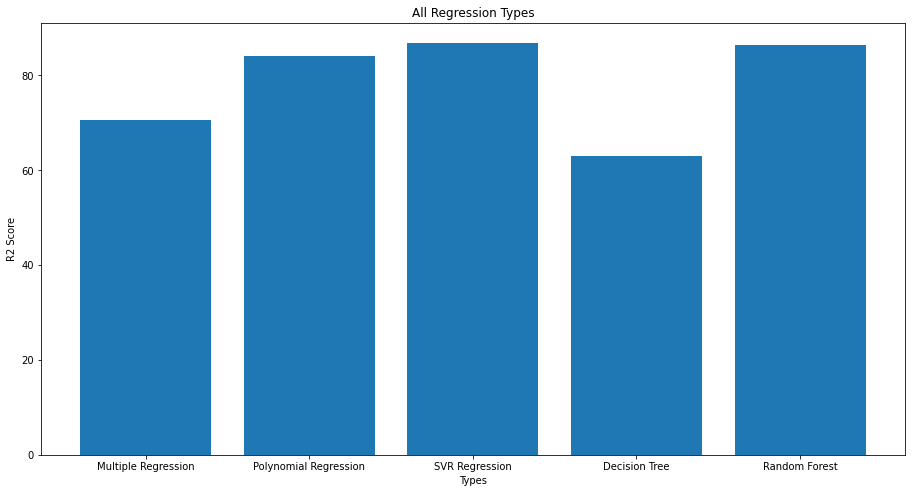


Max Score is:  86.70855157691061


In [29]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
types = ['Multiple Regression', 'Polynomial Regression', 'SVR Regression', 'Decision Tree', 'Random Forest']
score = [multiple_linear_score, polynomial_score, SVR_score, decision_tree_score, random_forest_score]
ax.bar(types, score)
ymax = max(score)
plt.title('All Regression Types')
plt.xlabel('Types')
plt.ylabel('R2 Score')
plt.show()
print('\nMax Score is: ', ymax)

THE OUTPUT OF THE MODEL DEPICTS SVR REGRESSION TO BE THE BEST SUITED MODEL FOR THE GIVEN REGRESSION PROBLEM GIVING AN R2 SCORE OF 86.708%

 **RESHAPING THE SVR MODEL AND VISUALIZING THE RESULTS {USING THE AGE FACTOR}**

In [30]:
X = dataset['age']
y = dataset['charges']
X = X.values.reshape(len(X),1)
y = y.values.reshape(len(y),1)

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [32]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

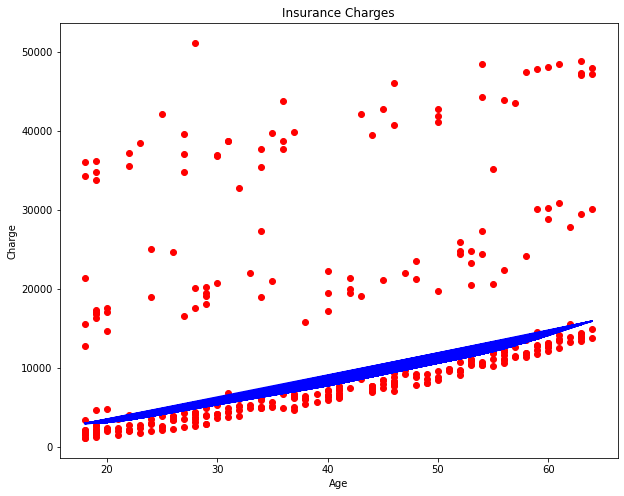

In [33]:
fig = plt.figure(figsize=(10,8))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.show()

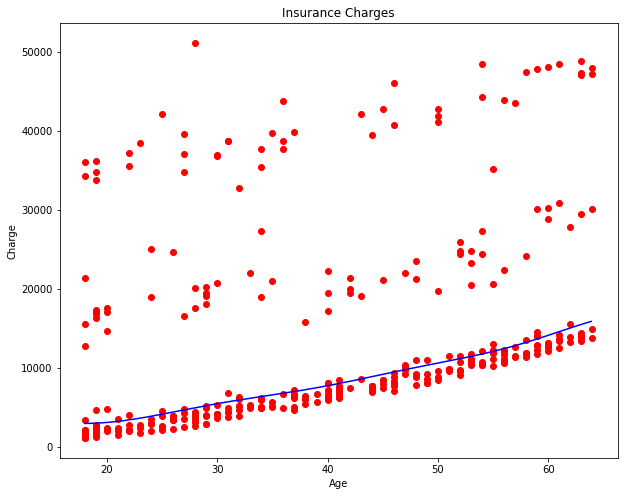

In [34]:
fig = plt.figure(figsize=(10,8))
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.show()